<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#利用TensorFlow实现线性回归" data-toc-modified-id="利用TensorFlow实现线性回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>利用TensorFlow实现线性回归</a></span><ul class="toc-item"><li><span><a href="#产生数据" data-toc-modified-id="产生数据-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>产生数据</a></span><ul class="toc-item"><li><span><a href="#给数据增加噪声:---y-=-1.25x-+-3.75-+-N" data-toc-modified-id="给数据增加噪声:---y-=-1.25x-+-3.75-+-N-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>给数据增加噪声:   y = 1.25x + 3.75 + N</a></span></li></ul></li></ul></li><li><span><a href="#对数据进行预处理" data-toc-modified-id="对数据进行预处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>对数据进行预处理</a></span></li><li><span><a href="#定义计算图" data-toc-modified-id="定义计算图-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>定义计算图</a></span></li><li><span><a href="#运行计算图" data-toc-modified-id="运行计算图-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>运行计算图</a></span></li></ul></div>

# 利用TensorFlow实现线性回归

输入x和输出y之间的关系是线性关系, 即: y = ax + b 

假设 a = 1.25, b = 3.75

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 产生数据

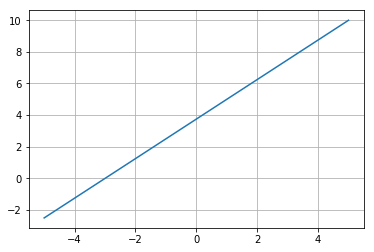

In [2]:
# 定义产生数据的函数
def linear(x):
    return 1.25 * x + 3.75

line_space = np.linspace(-5., 5., 1000)

plt.plot(line_space, linear(line_space))
plt.grid()

### 给数据增加噪声:   y = 1.25x + 3.75 + N

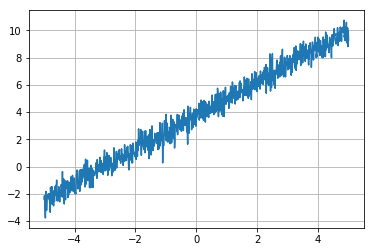

In [3]:
# 定义具有噪声的数据
def linear_with_n(x):
    return [linear(t) + np.random.normal(0, 0.5) for t in x]

plt.plot(line_space, linear_with_n(line_space))
plt.grid()

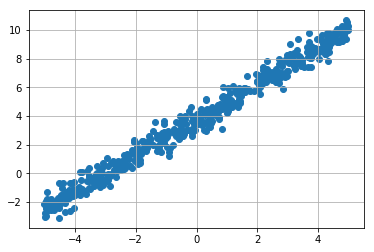

In [4]:
# 对噪声进行采样

sampled_x = np.random.choice(line_space, size=512)
sampled_y = linear_with_n(sampled_x)

plt.scatter(sampled_x, sampled_y)
plt.grid()

# 对数据进行预处理
* 分为训练集, 测试集  
* 定义产生batch生成器

In [5]:
whole = np.transpose(np.array([sampled_x, sampled_y]))
training_set = whole[:-64]
test_set = whole[-64:]

In [6]:
def gen_batch(data):
    for i in range(len(data) // 64):
        pos = 64 * i
        yield data[pos : pos + 64]

# 定义计算图

In [8]:
graph = tf.Graph()
with graph.as_default():
    # 定义placeholder
    x = tf.placeholder(shape=[None, 1], dtype=tf.float32, name='x')
    y = tf.placeholder(shape=[None, 1], dtype=tf.float32, name='y')
    # 定义变量
    a = tf.Variable(0.)
    b = tf.Variable(0.)
    # 定义模型
    linear_model = a * x + b
    # 定义损失函数
    loss = tf.reduce_mean(tf.square(linear_model - y))
    # 使用梯度下降优化
    opt = tf.train.GradientDescentOptimizer(0.0001).minimize(loss)

# 运行计算图

In [ ]:
with tf.Session(graph = graph) as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    step = 0
    for epoch in range(1000):
        for minibatch in gen_batch(training_set):
            _, l = sess.run([opt, loss],
                           feed_dict={x : np.reshape(minibatch[:,0], (-1, 1)),
                                     y : np.reshape(minibatch[:, 1], (-1, 1))})
            if step % 100 == 0:
                print "Training Loss: {:>10.4f}".format(l)
    
    print "Training Finished"
    
    res, l = sess.run([(a, b), loss], 
                      feed_dict = {x : np.reshape(test_set[:, 0], (-1, 1)),
                                  y : np.reshape(test_set[:, 1], (-1, 1))})
                      
    print "Testing Loss: {:>11.4f}".format(l)

In [21]:
res

(1.2633208, 2.8164718)

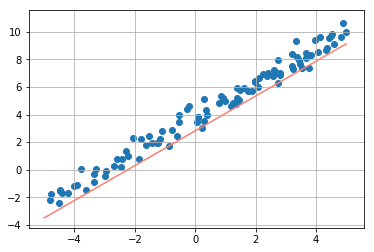

In [22]:
def pre(x, res):
    return x * res[0] + res[1]

plt.plot(line_space, pre(line_space, res), 'salmon')
plt.scatter(sampled_x[:100], sampled_y[:100])
plt.grid()